#### Описание столбцов данных в датасете:
•	Name — название игры  
•	Platform — платформа  
•	Year_of_Release — год выпуска  
•	Genre — жанр игры  
•	NA_sales — продажи в Северной Америке (миллионы долларов)  
•	EU_sales — продажи в Европе (миллионы долларов)  
•	JP_sales — продажи в Японии (миллионы долларов)  
•	Other_sales — продажи в других странах (миллионы долларов)  
•	Critic_Score — оценка критиков (максимум 100)  
•	User_Score — оценка пользователей (максимум 10)  
•	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### План работы:
    1. Ознакомление с данными.
    2. Предобработка данных.
    3. Анализ, визуализация.
    4. Вывод.

## Предобработка данных.

### Ознакомление.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/games.csv')
#pd.options.display.max_rows = 1000

#### Перевожу названия столбцов в нижний регистр.

In [3]:
df.columns = df.columns.str.lower()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Удаляю две строки в столбце 'name', в которых отсутствуют названия игр и информация о жанре. Это ошибка в базе данных.

In [5]:
df.dropna(subset = ['name'], inplace = True) 
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


#### 269 записей не содержат год выпуска. Заполню значением 3000, чтобы всегда было понятно, что это выброс. Также эти данные пригодны для анализа по другим признакам.

In [6]:
df.loc[df['year_of_release'].isna(),'year_of_release'] = 3000
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


#### Перевожу все строки в нижний регистр.

In [7]:
df['name'] = df['name'].str.lower()
df['platform'] = df['platform'].str.lower()
df['genre'] = df['genre'].str.lower()

#### Заполняю все NaN в столбцах critic_score, user_score, rating значением 3000, чтобы легко было определить выброс.

In [8]:
df.loc[df['critic_score'].isnull(), 'critic_score'] = 3000
df.loc[df['user_score'].isnull(), 'user_score'] = 3000
df.loc[df['rating'].isnull(), 'rating'] = 'NEIZVESTNO'

#### В столбце user_score 'TBD' = to be determined, означает, что рейтинг будет определён позднее. Заменю также на 3000.

In [9]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = 3000

#### Привожу все столбцы к нужным типам данных.

In [10]:
df['year_of_release'] = df['year_of_release'].astype('int')
df['critic_score'] = df['critic_score'].astype('int')
df['user_score'] = df['user_score'].astype('float')

### Причины появления пропусков:
    1. year_of_release - непонятно. По идее должны быть полные данные.
    2. user_score - tbd - рейтинг не успел сформироваться. Отсутствие рейтинга в других случаях на мой взгляд является ошибкой.
    3. rating - скорее всего ошибка загрузки или игра не пользуется популярностью.

#### Подсчёт общих продаж во всех регионах.

In [11]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

#### Проверка на дубликаты - отсутствуют.

In [12]:
print(df.duplicated().sum())

0


##### Исправление ошибки в дате продаж игры на платформе ds. Загуглил - данная игра была выпущена в 2007 году.

In [13]:
df.loc[(df['platform']=='ds')&(df['year_of_release']==1985),'year_of_release']=2007

## Анализ данных.

#### Подсчёт выпуска игр по годам.

##### График выпуска игр.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


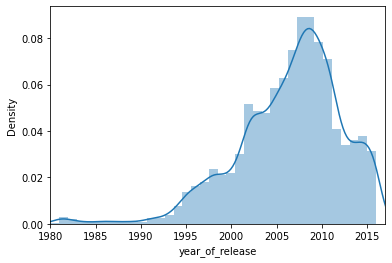

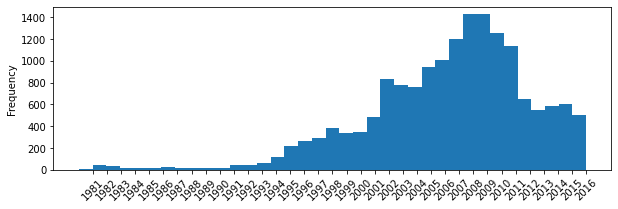

In [14]:
#df.groupby('year_of_release')['total_sales'].sum().plot()
plt.xlim(1980, 2017)
sns.distplot(df.loc[df['year_of_release']<3000]['year_of_release'], bins=37)
plt.show() 
df.loc[df['year_of_release']<3000]['year_of_release'].plot(kind='hist', range=(1980, 2016),bins=37,rot=45,figsize=(10, 3),xticks=[1980 + i for i in range(1, 37, 1)])

#### Подсчёт выпуска игр по годам.

In [15]:
cct = df['year_of_release'].value_counts().reset_index()
print(cct,'\n','\n')
print(df[df['year_of_release']<2000]['year_of_release'].count() / len(df))
print(df[df['year_of_release']<2000]['year_of_release'].count())
print(len(df))

    index  year_of_release
0    2008             1427
1    2009             1426
2    2010             1255
3    2007             1198
4    2011             1136
5    2006             1006
6    2005              939
7    2002              829
8    2003              775
9    2004              762
10   2012              653
11   2015              606
12   2014              581
13   2013              544
14   2016              502
15   2001              482
16   1998              379
17   2000              350
18   1999              338
19   1997              289
20   3000              269
21   1996              263
22   1995              219
23   1994              121
24   1993               60
25   1981               46
26   1992               43
27   1991               41
28   1982               36
29   1986               21
30   1983               17
31   1989               17
32   1987               16
33   1990               16
34   1988               15
35   1984               14
3

##### Вывод:
График похож скорее на распределение Пуассона наоборот. Но что мне скажет вид распределения в данном случае? На мой взгляд математические методы определения лет для анализа тут не очень уместны. Имеет смысл анализировать данные, начиная с 2000 года. В этот момент игры начали развиваться более обширно и это видно по графику. Ниже этого находится 1973 значений, ~11.81% от общего количества. Также не подлежат анализу значения года выпуска = 3000 (269 зачений, 1,61% от общего количества), которым были заполнены отсутствующие значения.

#### Анализ продаж по платформам.

In [16]:
platforms = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platforms.head(10)

platform
ps2     1255.77
x360     971.42
ps3      939.65
wii      907.51
ds       806.12
ps       730.86
gba      317.85
ps4      314.14
psp      294.05
pc       259.52
Name: total_sales, dtype: float64

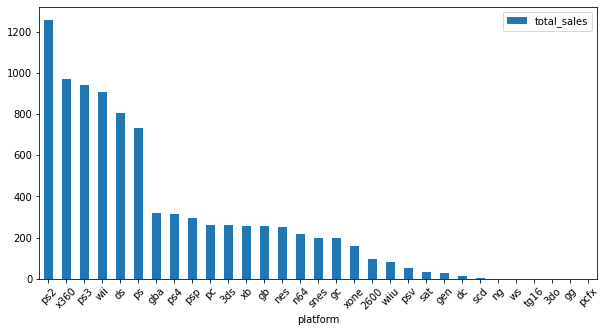

In [17]:
platforms.plot(kind='bar',rot=45,figsize=(10, 5),legend=True)

In [18]:
plats = platforms.index[0:6]
plat_pivot = df[(df['platform'].isin(plats))&(df['year_of_release']!=3000)].pivot_table(index=['platform','year_of_release'],values='total_sales', aggfunc='sum').sort_index().reset_index()
display(plat_pivot.head())
display(plat_pivot['platform'].value_counts())

,platform,year_of_release,total_sales
0,ds,2004,17.27
1,ds,2005,130.14
2,ds,2006,119.81
3,ds,2007,146.96
4,ds,2008,145.31


ps2     12
x360    12
wii     11
ps3     11
ds      10
ps      10
Name: platform, dtype: int64

##### Вывод:
Выделил 6 основных платформ, имеющих максимальные продажи. Это  ps, ps2, ps3, x360, wii, ds. Игровые платформы в среднем продаются в течение 11 лет. Также замечена ошибка: в платформе ds у одной игры указан год продаж 1985. При этом платформа была анонсирована в 2004 году.

#### Определение актуального периода для построения прогноза продаж в 2017 году.

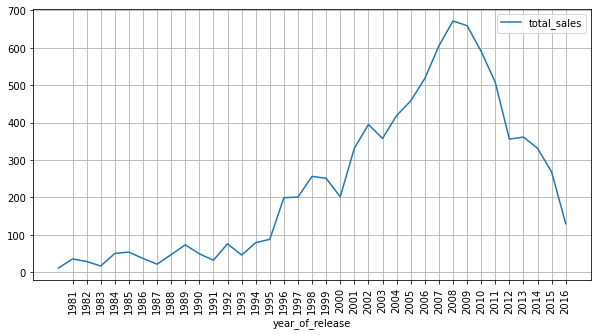

In [19]:
y_pivot = df.loc[df['year_of_release']<3000].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
y_pivot.plot(use_index=True, y='total_sales', grid=True, xticks=[1980 + i for i in range(1, 37, 1)],figsize=(10, 5),rot=90)

In [20]:
y_pivot['total_sales'].describe()

count     37.000000
mean     238.226216
std      207.598522
min       11.380000
25%       49.370000
50%      201.070000
75%      361.240000
max      671.500000
Name: total_sales, dtype: float64

##### Выводы:
График продаж также не похож на график нормального распределения. Это подтверждают значения метода describe(), которые показывают, что нормальное распределение находится с 1981 до 2001 года. По моему мнению, этот график говорит о том, что популярность игр на платформах уходит в прошлое и постепенно уступает первенство играм на мобильном телефоне. Этот фактор предстоит также учитывать.
  
**В итоге**, основываясь на 11-ти летнем цикле жизни игровой платформы на рынке, считаю, что анализировать надо примерно с половины этого цикла, отсчитывая его от 2016 года, т.е. с 2010 года.

#### Выбор лидирующих  платформ к 2016 году.

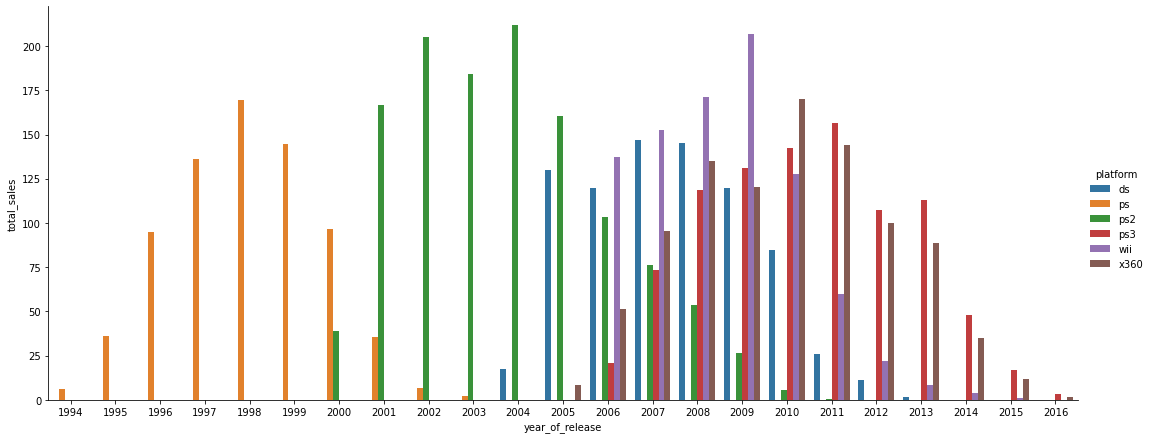

In [21]:
sns.catplot(x="year_of_release", y="total_sales", hue="platform", kind="bar", data=plat_pivot, height=6, aspect=2.5);

##### Промежуточный вывод:
Все платформы, которые ранее были выбраны в качестве лидеров по продажам в предыдущем задании, к 2016 году пришли к окончанию своего цикла жизни на рынке, который в среднем равен 11 годам. Поэтому, в дальнейшем анализе рассмотрены не будут. Требуется посмотреть на другие платформы.

##### Подготовка данных.

In [22]:
p_pivot_new = df[~(df['platform'].isin(plats))&(df['year_of_release']<3000)&(df['year_of_release']>=2010)].pivot_table(index=['platform','year_of_release'],values='total_sales', aggfunc='sum').sort_index().reset_index()
display(p_pivot_new.head())
display(p_pivot_new['platform'].value_counts())

,platform,year_of_release,total_sales
0,3ds,2011,63.20
1,3ds,2012,51.36
2,3ds,2013,56.57
3,3ds,2014,43.76
4,3ds,2015,27.78


pc      7
psp     6
psv     6
3ds     6
wiiu    5
ps4     4
xone    4
Name: platform, dtype: int64

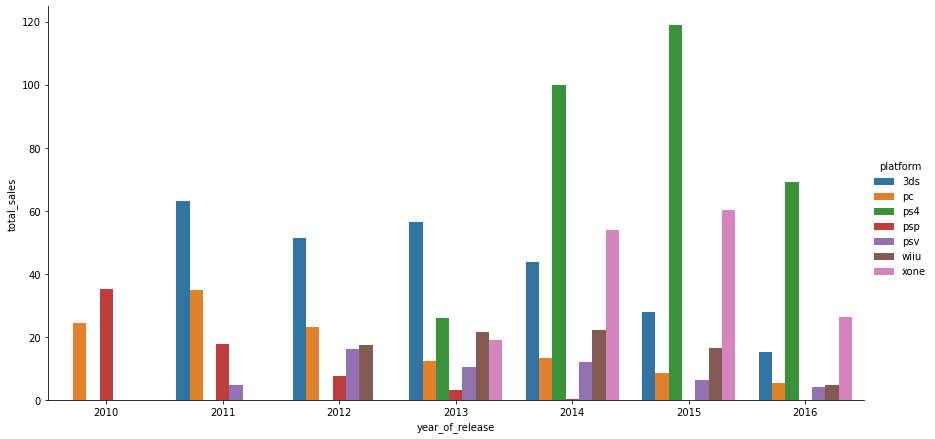

In [23]:
sns.catplot(x="year_of_release", y="total_sales", hue="platform", kind="bar", data=p_pivot_new, height=6, aspect=2);

#### Данные о продажах игр, выпущенных в 2016 году, по платформам.

In [24]:
p_pivot_new.loc[p_pivot_new['year_of_release']==2016].sort_values('total_sales', ascending=False)

,platform,year_of_release,total_sales
16,ps4,2016,69.25
37,xone,2016,26.15
5,3ds,2016,15.14
12,pc,2016,5.25
33,wiiu,2016,4.60
28,psv,2016,4.25


##### Выводы:
Итого, "в живых" остались следующие платформы: pc, psv, psp, 3ds, wiiu, xone, ps4.  
Как видно на графике и в таблице, на 2016 год актуальными являются следующие платформы (в порядке убывания):
    1. ps4
    2. xone
    3. 3ds
    4. pc
    5. wiiu
    6. psv
    
Для платформы psp игры перестали выпускаться ещё в 2015 году.

#### Ящик с усами - графики продаж игр по платформам.

##### Присвою переменную с актуальными для анализа платформами и сделаю по ним срез данных по всем годам.

In [25]:
p_2016 = p_pivot_new[p_pivot_new['year_of_release']==2016]['platform'].unique().tolist()
platforms_actual = df.loc[df['platform'].isin(p_2016)]

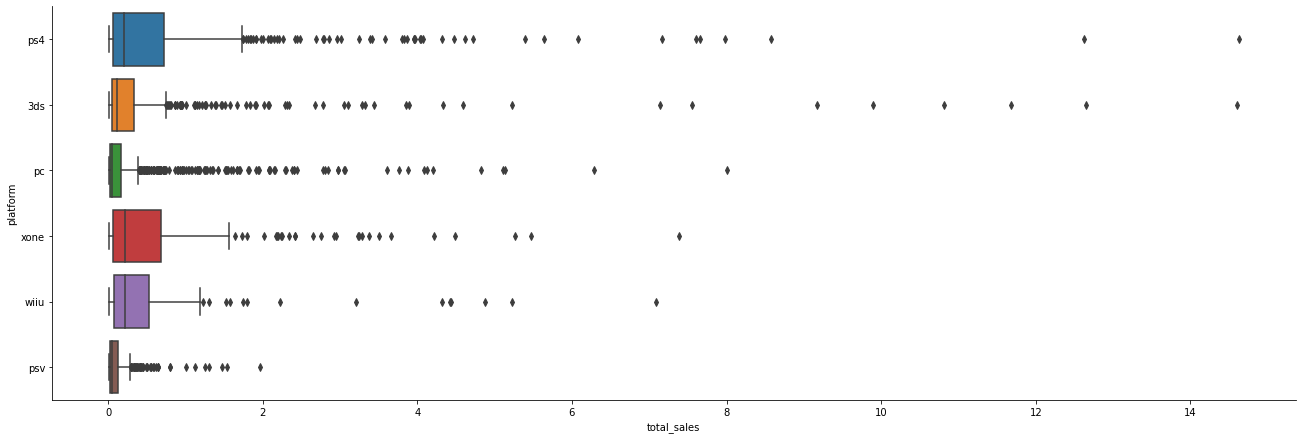

In [26]:
g = sns.catplot(y="platform", x="total_sales", data=platforms_actual, kind="box", orient="h", height=6, aspect=3)

##### Общие, средние и медианные продажи по платформам

In [27]:
data_actual=pd.DataFrame(columns=['platform','total','mean','median','difference'])

for row in p_2016:
    s_mean = round(platforms_actual.loc[platforms_actual['platform']==row]['total_sales'].mean(),2)
    s_median = round(platforms_actual.loc[platforms_actual['platform']==row]['total_sales'].median(),2)
    tot = round(platforms_actual.loc[platforms_actual['platform']==row]['total_sales'].sum(),2)    
    diff = round(s_mean - s_median,2)
    data_actual = data_actual.append({'platform':row,'mean':s_mean,'median':s_median,'difference':diff,'total':tot}, ignore_index=True)
data_actual.sort_values('total',ascending=False,inplace=True)
data_actual

,platform,total,mean,median,difference
2,ps4,314.14,0.80,0.20,0.60
1,pc,259.52,0.27,0.05,0.22
0,3ds,259.00,0.50,0.12,0.38
5,xone,159.32,0.65,0.22,0.43
4,wiiu,82.19,0.56,0.22,0.34
3,psv,54.07,0.13,0.06,0.07


##### Выводы:
1. Несмотря на существенно отличающийся объём продаж, графики платформ ps4 и xone в плане "усов" очень похожи.
2. Графики продаж pc и psv довольно похожи. Однако, объём продаж у pc практически в пять раз выше.
3. Медианные продажи для xone и wiiu одинаковые, несмотря на практически двухкратную разницу в объёме продаж.
4. Несмотря на низкие средние и медианные продажи игр на pc, по объёму продаж данная платформа находится на втором месте.  

Таким образом, анализируя график, можно иметь понимание о совокупном объёме продаж по количеству выбросов справа, несмотря на размер "усов", IQR, медиану и положение 1 и 3 квартилей.

#### Влияние отзывов пользователей и критиков на продажи по платформам.

##### Подготовка данных.

In [28]:
p_score = platforms_actual.loc[(platforms_actual['critic_score']!=3000)&(platforms_actual['user_score']!=3000)]
p_score = p_score[['platform','critic_score','user_score','total_sales']]
p_score

,platform,critic_score,user_score,total_sales
40,3ds,85,8.2,12.65
42,ps4,97,8.3,12.62
53,3ds,90,8.4,10.81
62,3ds,78,7.2,9.90
73,3ds,88,8.7,9.17
...,...,...,...,...
16660,xone,74,6.7,0.01
16692,pc,80,7.6,0.01
16696,pc,61,5.8,0.01
16702,pc,60,7.2,0.01


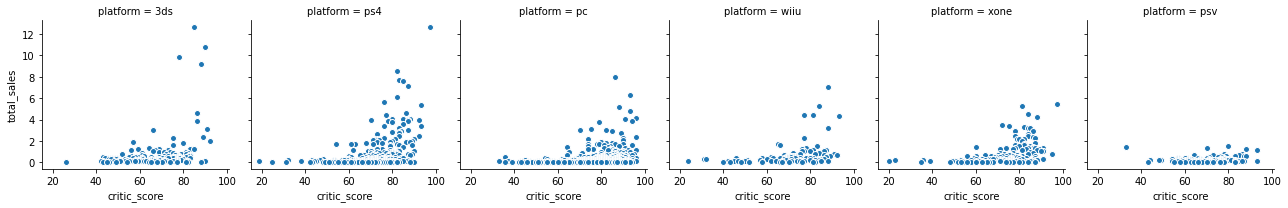

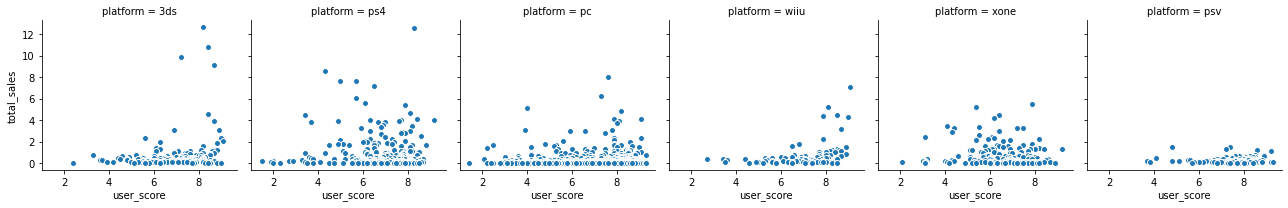

In [29]:
g = sns.FacetGrid(p_score, col="platform")
g = g.map(plt.scatter, "critic_score", "total_sales", edgecolor="w")
b = sns.FacetGrid(p_score, col="platform")
b = b.map(plt.scatter, "user_score", "total_sales", edgecolor="w")

In [30]:
correlation=pd.DataFrame(columns=['platform','correlation_critic_score','correlation_user_score'])
for row in p_score['platform'].unique().tolist():
    data_slice = p_score[p_score['platform']==row]
    corr_c = data_slice['total_sales'].corr(data_slice['critic_score'])
    corr_u = data_slice['total_sales'].corr(data_slice['user_score'])
    correlation = correlation.append({'platform':row,'correlation_critic_score':corr_c,'correlation_user_score':corr_u},ignore_index=True)
correlation

,platform,correlation_critic_score,correlation_user_score
0,3ds,0.339824,0.233403
1,ps4,0.405895,-0.033625
2,pc,0.256409,0.001108
3,wiiu,0.350882,0.391848
4,xone,0.410422,-0.094003
5,psv,0.131349,0.038374


##### Выводы:
Можно сказать, что имеются платформы с играми, чувствительными к отзывам пользователей и критков, а есть платформы, где отзывы практически не влияют на продажи.

Влияние оценок критиков и пользователей на продажи платформ:
1. 3ds - ниже среднего влияние критиков, ещё меньше влияние пользователей.
2. ps4 - среднее влияние критиков, нет влияния пользователей.
3. pc - слабое влияние критиков, нет влияния пользователей.
4. wiiu - среднее влияние критиков и пользователей.
5. xone - среднее влияние критиков, нет влияния пользователей.
6. psv - практически отсутствует влияние критиков, нет влияния пользователей.

#### Соотнесите выводы с продажами игр на других платформах - ранее были выделены платформы-лидеры по продажам, переменная plats.

##### Подготовка таблицы с общими продажами, медианой, средним продаж по платформам-лидерам за всё время продаж игр.

In [31]:
plats

Index(['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps'], dtype='object', name='platform')

In [32]:
platforms = df[(df['platform'].isin(plats))]

In [33]:
platforms_old=pd.DataFrame(columns=['platform','total','mean','median','difference'])

for row in plats:
    s_mean = round(platforms.loc[platforms['platform']==row]['total_sales'].mean(),2)
    s_median = round(platforms.loc[platforms['platform']==row]['total_sales'].median(),2)
    tot = round(platforms.loc[platforms['platform']==row]['total_sales'].sum(),2)    
    diff = round(s_mean - s_median,2)
    platforms_old = platforms_old.append({'platform':row,'mean':s_mean,'median':s_median,'difference':diff,'total':tot}, ignore_index=True)
platforms_old.sort_values('total',ascending=False,inplace=True)
platforms_old

,platform,total,mean,median,difference
0,ps2,1255.77,0.58,0.23,0.35
1,x360,971.42,0.77,0.28,0.49
2,ps3,939.65,0.71,0.27,0.44
3,wii,907.51,0.69,0.19,0.50
4,ds,806.12,0.37,0.11,0.26
5,ps,730.86,0.61,0.26,0.35


In [34]:
data_actual

,platform,total,mean,median,difference
2,ps4,314.14,0.80,0.20,0.60
1,pc,259.52,0.27,0.05,0.22
0,3ds,259.00,0.50,0.12,0.38
5,xone,159.32,0.65,0.22,0.43
4,wiiu,82.19,0.56,0.22,0.34
3,psv,54.07,0.13,0.06,0.07


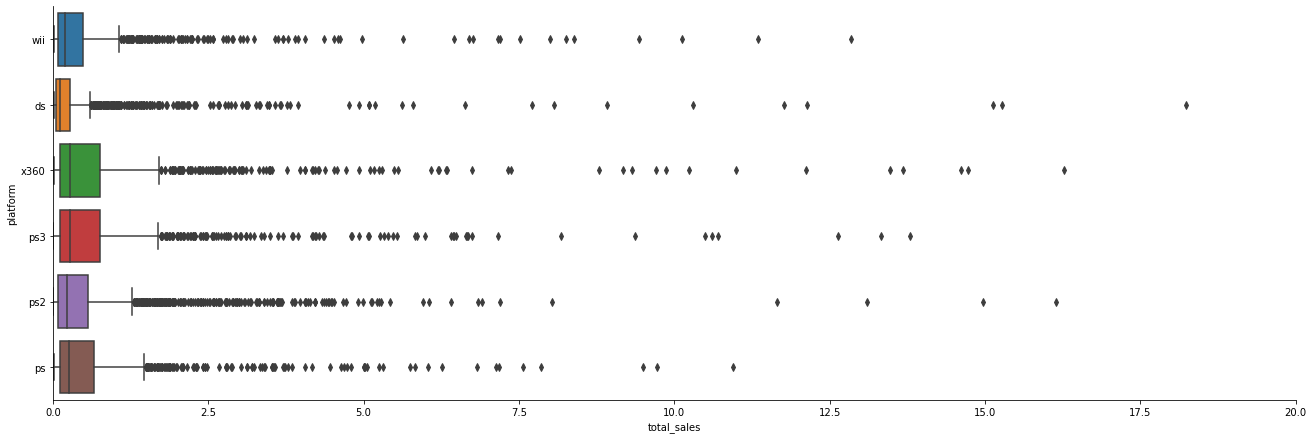

In [35]:
e = sns.catplot(y="platform", x="total_sales", data=platforms, kind="box", orient="h", height=6, aspect=3)
e.set(xlim=(0,20))

##### Выводы:
1. Объемы продаж платформ-лидеров существенно выше тех, что остались к 2016 году.
2. Их медианные продажи в основном выше, чем продажи актуальных к 2016 году платформ, это говорит о том, что в основном продажи каждой игры были выше и постепенно снизились к 2016 году.
3. "Ящики с усами" платформ-лидеров примерно одинаковы, это говорит о том, что продажи были примерно равны. Так оно и есть, если взглянуть на общую таблицу продаж.
4. Графики платформ-лидеров характеризуются большими выбросами справа, такого не наблюдается у платформ, актуальных к 2016 году.

####  Распределение игр по жанрам.

In [36]:
by_genres = df.pivot_table(index='genre', values=['name','total_sales'],aggfunc={'name':'count','total_sales':'sum'}).sort_values('total_sales',ascending=False).reset_index()
by_genres

,genre,name,total_sales
0,action,3369,1744.17
1,sports,2348,1331.27
2,shooter,1323,1052.45
3,role-playing,1498,934.56
4,platform,888,827.77
5,misc,1750,802.51
6,racing,1249,728.67
7,fighting,849,447.53
8,simulation,873,389.97
9,puzzle,580,242.57


##### Выводы:
1. Можно чётко выделить жанры с высокими продажами и жанры с низкими продажами.
2. Самые высокие продажи у тройки лидеров жанров по продажам - action, sports, shooter.
3. Самые низкие продажи у тройки аутсайдеров - puzzle, adventure, strategy.
4. Имеются жанры, для которых выпущено очень много игр, но их продажи не оправдали себя.

#### Составить портрет пользователя каждого региона.

##### Выделение топ-5 платформ по количеству проданных игр в каждом регионе.

In [37]:
eu_platf = df.loc[df['eu_sales']!=0]
jp_platf = df.loc[df['jp_sales']!=0]
na_platf = df.loc[df['na_sales']!=0]

In [38]:
eu_reg = eu_platf.pivot_table(index='platform', values='eu_sales',aggfunc='count',margins=True,margins_name='total').reset_index()
eu_reg['percent_from_total'] = round(eu_reg['eu_sales']*100/eu_reg.iloc[-1, 1], 2)
eu_reg.drop(eu_reg.index[-1], inplace=True)

In [39]:
na_reg = na_platf.pivot_table(index='platform', values='na_sales',aggfunc='count',margins=True,margins_name='total').reset_index()
na_reg['percent_from_total'] = round(na_reg['na_sales']*100/na_reg.iloc[-1, 1], 2)
na_reg.drop(na_reg.index[-1], inplace=True)

In [40]:
jp_reg = jp_platf.pivot_table(index='platform', values='jp_sales',aggfunc='count',margins=True,margins_name='total').reset_index()
jp_reg['percent_from_total'] = round(jp_reg['jp_sales']*100/jp_reg.iloc[-1, 1], 2)
jp_reg.drop(jp_reg.index[-1], inplace=True)

In [41]:
print("Регион - Европа")
display(eu_reg.sort_values('eu_sales',ascending=False).reset_index().head())
print('Регион - Северная Америка')
display(na_reg.sort_values('na_sales',ascending=False).reset_index().head())
print('Регион - Япония')
display(jp_reg.sort_values('jp_sales',ascending=False).reset_index().head())

Регион - Европа


,index,platform,eu_sales,percent_from_total
0,12,ps2,1635,15.08
1,22,x360,990,9.13
2,11,ps,983,9.06
3,13,ps3,961,8.86
4,10,pc,908,8.37


Регион - Северная Америка


,index,platform,na_sales,percent_from_total
0,12,ps2,1648,13.50
1,3,ds,1525,12.49
2,20,wii,1145,9.38
3,22,x360,1143,9.36
4,13,ps3,1008,8.26


Регион - Япония


,index,platform,jp_sales,percent_from_total
0,15,ps2,797,12.85
1,3,ds,764,12.32
2,18,psp,764,12.32
3,16,ps3,714,11.52
4,14,ps,402,6.48


##### Вывод:
1. ps2 и ps3 - лидирующие платформы, встречающиеся в выборке каждого региона.
2. ps2 стабильно занимала от 12 до 15 процентов рынка региона.
3. Другие платформы в топ-5 имеют долю рынка от 9 до 13 процентов.
4. Для Японии характерно примерно одинаковое количество проданных игр и примерно одинаковая доля рынка на каждой платформе (исключение - ps).
5. Для Северной Америки характерен больший разброс по продажам.
6. В Европе наблюдаются примерно процент рынка у лидирующих платформ, за исключением ps2, у которой он значительно выше.

##### Выделение топ-5 жанров по количеству проданных игр в каждом регионе.

In [42]:
eu_gen = eu_platf.pivot_table(index='genre', values='eu_sales',aggfunc='count',margins=True,margins_name='total').reset_index()
eu_gen['percent_from_total'] = round(eu_gen['eu_sales']*100/eu_gen.iloc[-1, 1], 2)
eu_gen.drop(eu_gen.index[-1], inplace=True)

In [43]:
na_gen = na_platf.pivot_table(index='genre', values='na_sales',aggfunc='count',margins=True,margins_name='total').reset_index()
na_gen['percent_from_total'] = round(na_gen['na_sales']*100/na_gen.iloc[-1, 1], 2)
na_gen.drop(na_gen.index[-1], inplace=True)

In [44]:
jp_gen = jp_platf.pivot_table(index='genre', values='jp_sales',aggfunc='count',margins=True,margins_name='total').reset_index()
jp_gen['percent_from_total'] = round(jp_gen['jp_sales']*100/jp_gen.iloc[-1, 1], 2)
jp_gen.drop(jp_gen.index[-1], inplace=True)

In [45]:
print("Регион - Европа")
display(eu_gen.sort_values('eu_sales',ascending=False).reset_index().head())
print('Регион - Северная Америка')
display(na_gen.sort_values('na_sales',ascending=False).reset_index().head())
print('Регион - Япония')
display(jp_gen.sort_values('jp_sales',ascending=False).reset_index().head())

Регион - Европа


,index,genre,eu_sales,percent_from_total
0,0,action,2454,22.63
1,10,sports,1563,14.41
2,8,shooter,1089,10.04
3,6,racing,1020,9.41
4,3,misc,954,8.80


Регион - Северная Америка


,index,genre,na_sales,percent_from_total
0,0,action,2617,21.44
1,10,sports,1861,15.25
2,3,misc,1220,10.00
3,8,shooter,1164,9.54
4,6,racing,1104,9.04


Регион - Япония


,index,genre,jp_sales,percent_from_total
0,0,action,1194,19.26
1,7,role-playing,1061,17.11
2,1,adventure,753,12.15
3,10,sports,601,9.69
4,3,misc,540,8.71


##### Выводы.
1. Регионы Европа и Северная Америка идентичны по своим предпочтениям жанров в топ-5.
2. Жанры action, sports, misc популярны во всех трёх регионах.
3. Средняя доля рынка, рассчитаная по топ-5 жанрам для каждого региона примерно одинакова и равна 13-13,5%.
4. Япония отличается в своих предпочтениях по жанрам, отдавая предпочтение тем, которые непопулярны в других регионах.

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [46]:
ratings = df[df['rating']!='NEIZVESTNO'].copy()

In [47]:
cols= ['na_sales','eu_sales','jp_sales']
cols1 = ['na','eu','jp']
ratings[cols1] = ratings[cols].astype('bool')
rp_na = ratings[ratings['na_sales']!=0].pivot_table(index='rating',values=['na','na_sales'],aggfunc='sum').sort_values('na',ascending=False)
rp_eu = ratings[ratings['eu_sales']!=0].pivot_table(index='rating',values=['eu','eu_sales'],aggfunc='sum').sort_values('eu',ascending=False)
rp_jp = ratings[ratings['jp_sales']!=0].pivot_table(index='rating',values=['jp','jp_sales'],aggfunc='sum').sort_values('jp',ascending=False)

In [48]:
display('Северная Америка', rp_na)
display('Европа', rp_eu)
display('Япония', rp_jp)

'Северная Америка'

,na,na_sales
rating,,
E,3761,1292.99
T,2650,759.75
M,1423,748.48
E10+,1328,353.32
EC,8,1.53
K-A,2,2.56
AO,1,1.26


'Европа'

,eu,eu_sales
rating,,
E,2866,710.25
T,2434,427.03
M,1459,483.97
E10+,1048,188.52
K-A,3,0.27
RP,3,0.08
EC,2,0.11
AO,1,0.61


'Япония'

,jp,jp_sales
rating,,
T,847,151.40
E,572,198.11
M,548,64.24
E10+,235,40.20
K-A,1,1.46


##### Выводы:
1. Самые массовые продажи во всех трёх регионах показывают рейтинги: E, T, M, E10, K-A.
2. Трудно сказать, оказывает ли рейтинг влияние на продажи, или это просто самые популярные игры имеют такой рейтинг и сам факт присвоения определённого рейтинга ни о чём не говорит.
3. Для более точного понимания, влияет ли рейтинг ESRB на продажи buh, следует анализировать продажи до присвоения рейтинга и после.

#### Проверка гипотез.

#### 1.
H0 - cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
H1 - cредние пользовательские рейтинги платформ Xbox One и PC отличаются.

In [49]:
ratings_pc = df[(df['user_score']!=3000)&(df['platform']=='pc')]
ratings_xone = df[(df['user_score']!=3000)&(df['platform']=='xone')]

In [50]:
alpha = 0.05
results = st.ttest_ind(ratings_pc['user_score'], ratings_xone['user_score'])
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3896435533548819e-05
Отвергаем нулевую гипотезу


#### Вывод:
Отвергаем нулевую гипотезу о том, что средние пользовательские рейтинги платформ PC и Xbox One одинаковые.

#### 2.
H0 - средние пользовательские рейтинги жанров Action и Sports одинаковые.  
H1 - средние пользовательские рейтинги жанров Action и Sports разные.

In [51]:
ratings_action = df[(df['user_score']!=3000)&(df['genre']=='action')]
ratings_sports = df[(df['user_score']!=3000)&(df['genre']=='sports')]

In [52]:
alpha = 0.05
results = st.ttest_ind(ratings_action['user_score'], ratings_sports['user_score'])
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10406951359049141
Не получилось отвергнуть нулевую гипотезу


#### Вывод:
Не получилось отвергнуть нулевую гипотезу H0 - средние пользовательские рейтинги жанров Action и Sports одинаковые. C вероятностью 11,48% такое равенство можно получить случайно.

# Выводы:
Было проведено исследование исторических данных продаж игр для разных платформ с 1980 по 2016 годы.
1. По результатам исследования получены данные о том, что среднее время актуального присутствия платформы на рынке составляет примерно 11 лет.
2. Наиболее популярные по продажам за всё время платформы: ps2, x360, ps3, wii, ds, ps.
3. Продажи игр достигли своего пика в 2008 году и с того времени неуклонно падают.
4. В 2016 году актуальными остаются платформы pc, psv, 3ds, wiiu, xone, ps4.
5. Продажи по ним будут ниже, чем в 2016 году.
6. Наиболее популярные жанры - action, sports, shooter/
7. Для некоторых платформ характерно среднее или слабое влияние на продажи рейтинга игр от критиков.
8. Влияние рейтинга от пользователей на продажи игр выражено значительно слабее. Можно сказать, практически отсутствует.
9. Регионы Северная Америка и Европа похожи по своим предпочтениям по жанрам игр, Япония от них существенно отличается.
10. В целом, считаю снижение продаж игр закономерным, вследствие переноса интереса пользователей в сторону:
            * Игр на мобильных платформах (Android, IOS).
            * Бесплатных онлайн-игр с донатами.